# Comparison of results

In [1]:
import pickle

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from scipy.stats import wilcoxon

In [2]:
def plot_fitness_evolution(ax, log):
    blue_patch = mpatches.Patch(color='tab:blue', label='CGP')
    orange_patch = mpatches.Patch(color='tab:orange', label='RV-CGP')
    
    cgp, pso = log
    fitns = []
    for run in cgp:
        fitns.append(run)
    ax.plot(np.mean(fitns, axis=0), label='CGP')
    
        
    
    ax1 = ax.twiny()
    
    fitns = []
    for run in pso:
        fitns.append([x[2] for x in run])
    ax1.plot(np.mean(fitns, axis=0), label='PSO-CGP', color='tab:orange')
    ax1.set_yscale('log')
    
    ax.set_xlabel('Evaluations')
    ax.legend(handles=[blue_patch, orange_patch])
    
    ax.set_xticks([], [])
    ax1.set_xticks([], [])
    ax.set_xticks([0, 20000], [])
    ax.set_xticklabels(['0', '1e5'])
    return ax1

def load_log(bench_name):
    cgp = pickle.load(open(f'results/baseline_100_000_demo/{bench_name}_log_100_000evals', 'rb'))
    pso = pickle.load(open(f'results/pso_default_20_demo/{bench_name}_log_100_000evals', 'rb'))
    return cgp, pso

def load_data(bench_name, baseline):
    if baseline:
        return pickle.load(open(f'results/baseline_100_000/{bench_name}_res_100_000evals','rb'))
    return pickle.load(open(f'results/pso_default_20/{bench_name}_res_100_000evals', 'rb'))

def plot_histograms(data1, data2, **kw):
    _, ax = plt.subplots(1, 1)
    plot_to_axis(ax, data1, data2, **kw)
    return ax

def plot_to_axis(ax, data1, data2, **kw):
    sns.distplot(data1, kde=False, label='CGP', ax=ax, **kw)
    sns.distplot(data2, kde=False, label='PSO-CGP', ax=ax, **kw)
    ax.set_xlabel('MSE')
    ax.legend()

# Distribution of best results

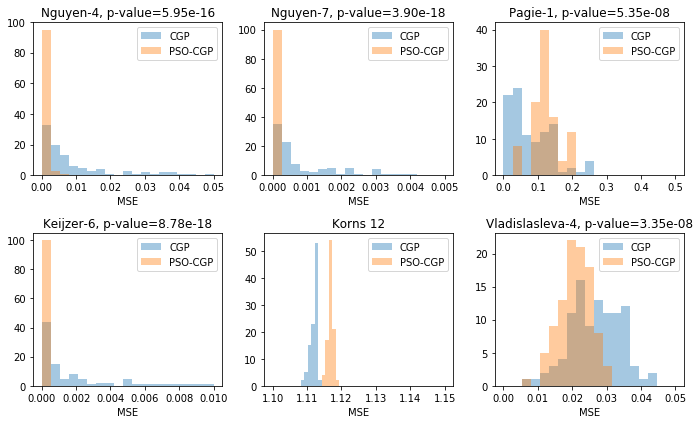

In [20]:
fig, axes = plt.subplots(2,3, figsize=(10, 6));


cgp = load_data('ng4', True)
pso = load_data('ng4', False)
axes[0][0].set_title(f'Nguyen-4, p-value={wilcoxon(cgp, pso).pvalue:.2e}')
plot_to_axis(axes[0][0], 
             cgp, 
             pso, bins=list(np.linspace(0, 0.05, 20)))


cgp = load_data('ng7', True)
pso = load_data('ng7', False)
axes[0][1].set_title(f'Nguyen-7, p-value={wilcoxon(cgp, pso).pvalue:.2e}')
plot_to_axis(axes[0][1], 
             load_data('ng7', True), 
             load_data('ng7', False), bins=list(np.linspace(0, 0.005, 20)))

cgp = load_data('pag1', True)
pso = load_data('pag1', False)
axes[0][2].set_title(f'Pagie-1, p-value={wilcoxon(cgp, pso).pvalue:.2e}')
plot_to_axis(axes[0][2], 
             load_data('pag1', True), 
             load_data('pag1', False), bins=list(np.linspace(0, 0.5, 20)))


cgp = load_data('kei6', True)
pso = load_data('kei6', False)
axes[1][0].set_title(f'Keijzer-6, p-value={wilcoxon(cgp, pso).pvalue:.2e}')
plot_to_axis(axes[1][0], 
             load_data('kei6', True), 
             load_data('kei6', False), bins=list(np.linspace(0, 0.01, 20)))

axes[1][1].set_title('Korns 12')
plot_to_axis(axes[1][1], 
             load_data('korns12', True), 
             load_data('korns12', False), bins=list(np.linspace(1.10, 1.15, 50)))

cgp = load_data('vlad4', True)
pso = load_data('vlad4', False)
axes[1][2].set_title(f'Vladislasleva-4, p-value={wilcoxon(cgp, pso).pvalue:.2e}')
plot_to_axis(axes[1][2], 
             load_data('vlad4', True), 
             load_data('vlad4', False), bins=list(np.linspace(0, 0.05, 20)))

for row in axes:
    for cell in row:
        cell.legend()

plt.tight_layout()

plt.savefig('distplots.pdf', format='pdf', dpi=1000)

In [14]:
np.mean(load_data('korns12', True))

1.1120007688549993

# Fitness evolution

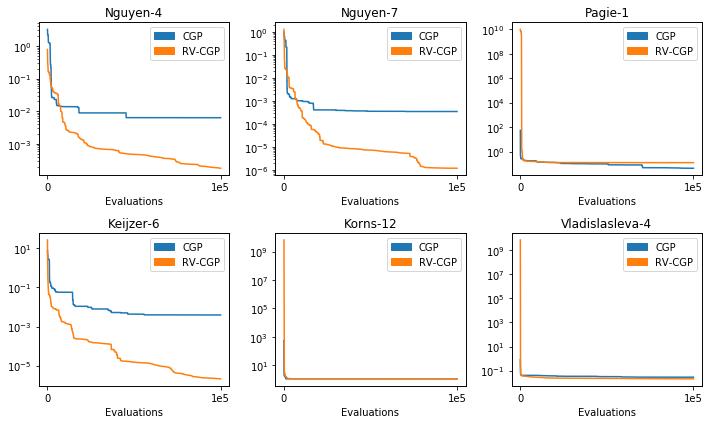

In [74]:
fig, axes = plt.subplots(2,3, figsize=(10, 6));

log = load_log('ng4')
plot_fitness_evolution(axes[0][0], log)
axes[0][0].set_title('Nguyen-4')

log = load_log('ng7')
plot_fitness_evolution(axes[0][1], log)
axes[0][1].set_title('Nguyen-7')

log = load_log('pag1')
plot_fitness_evolution(axes[0][2], log)
axes[0][2].set_title('Pagie-1')

log = load_log('kei6')
plot_fitness_evolution(axes[1][0], log)
axes[1][0].set_title('Keijzer-6')

log = load_log('korns12')
plot_fitness_evolution(axes[1][1], log)
axes[1][1].set_title('Korns-12')

log = load_log('vlad4')
plot_fitness_evolution(axes[1][2], log)
axes[1][2].set_title('Vladislasleva-4')


plt.tight_layout()

plt.savefig('fitness-evolution.pdf', format='pdf', dpi=1000)